<a href="https://colab.research.google.com/github/YifeiZhang233eV/Fractals/blob/main/Fractal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

Import Libraries

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
print("PyTorch Version:", torch.__version__)
# Ensure that the right computational device has been set and is available to use when needed
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

PyTorch Version: 2.3.1+cu121
cuda


In [ ]:
# grid for computing image, subdivide the space - from -4 to 4 at interval of 0.01
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)

# Compute Gaussian function
gaussian_z = torch.exp(-(x**2+y**2)/2.0)

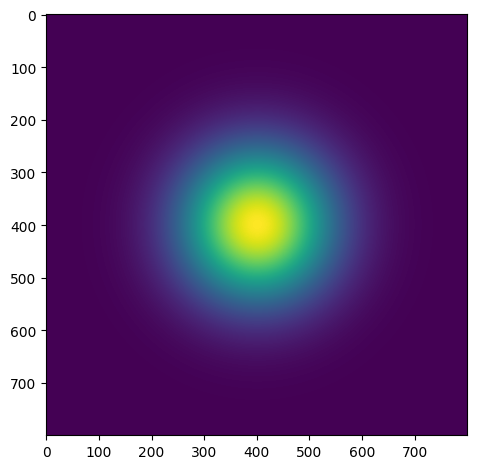

In [ ]:
#plot
plt.imshow(gaussian_z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()

# The value of the Gaussian function reaches its maximum at the center (usually the origin)
# and then decreases rapidly with increasing distance from the center.

Q1. Change the Gaussian function into a 2D sine or cosine function



*   The patterns of sine and cosine are periodic.
*   sin(0) = 0, then the centre of it is empty; cos(0) = 1, then the value is at the centre.



In [ ]:
cos_z = torch.cos(x**2 + y**2)
sin_z = torch.sin(x**2 + y**2)

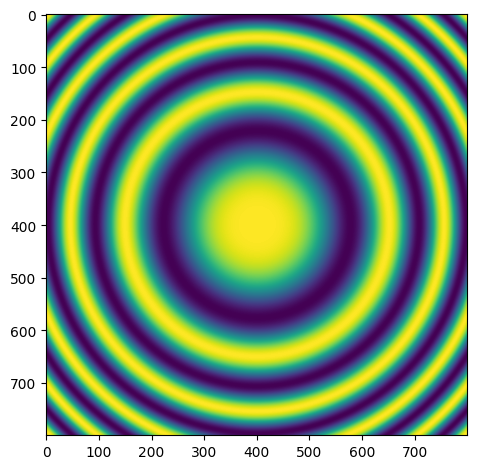

In [ ]:
plt.imshow(cos_z.cpu().numpy())
plt.tight_layout()
plt.show()

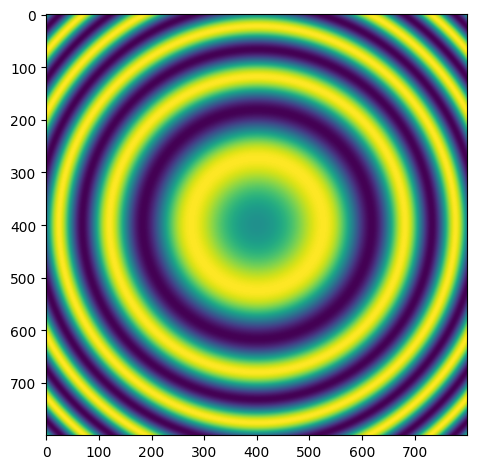

In [ ]:
plt.imshow(sin_z.cpu().numpy())
plt.tight_layout()
plt.show()

Q2. What do you get when you multiply both the Gaussian and the sine/cosine function together and visualise it?

*   The high-frequency info (ripple features) has been smoothed out, making the image smoother and softer.

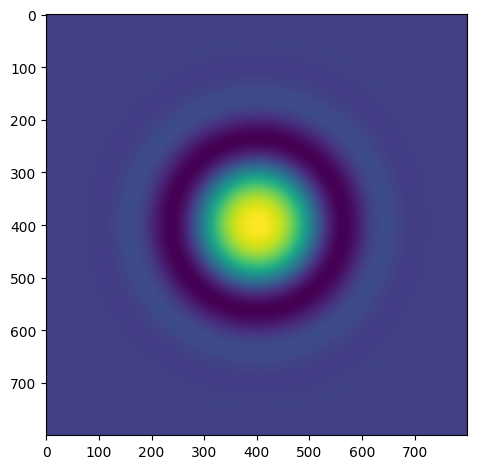

In [ ]:
z_multi_cos = gaussian_z * cos_z
plt.imshow(z_multi_cos.cpu().numpy())
plt.tight_layout()
plt.show()

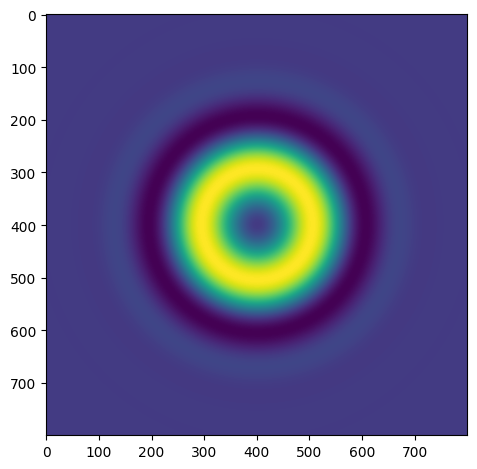

In [ ]:
z_multi_sin = gaussian_z * sin_z
plt.imshow(z_multi_sin.cpu().numpy())
plt.tight_layout()
plt.show()

# Part 2

### Mandelbrot set



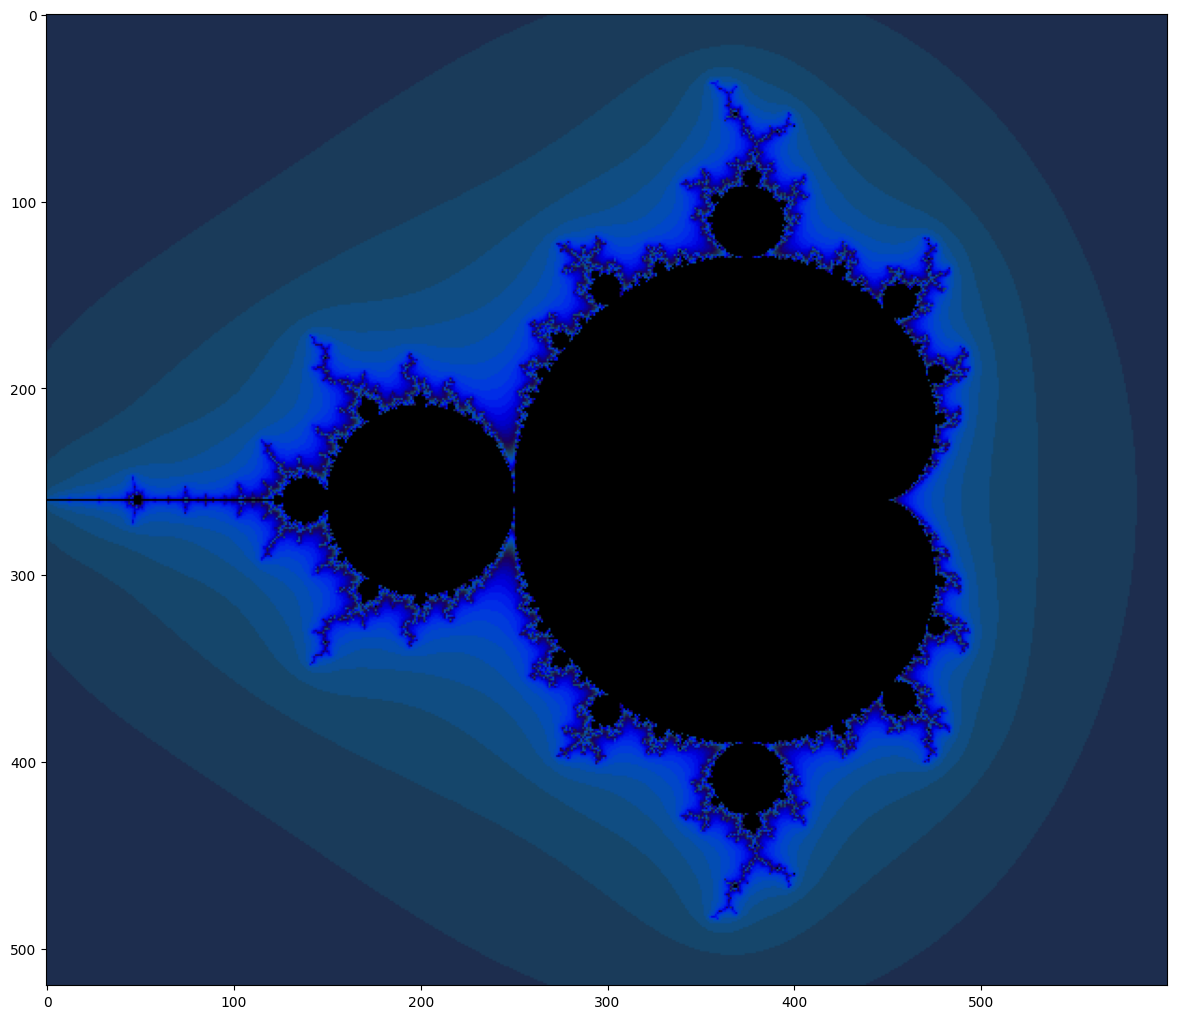

In [ ]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important - Convert a real tensor to a complex tensor
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
# Times of iteration: affect the accuracy and calculation time
for i in range(200):
    # Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    #Have we diverged with this new value?
    # Feature of the Mandelbrot:
    # If the magnitude of a complex number exceeds 4, then it diverges to infinity
    not_diverged = torch.abs(zs_) < 4.0
    # Update variables to compute
    ns += not_diverged
    zs = zs_

#plot
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""

    if np.iscomplexobj(a): # to solve a complex warning
        a = np.abs(a)

    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

Q1. High resolution computation of the set by decreasing the mgrid spacing and zooming to another part of the Mandelbrot set and compute the image for it. This may increase the computation time significantly, so choose a value that balances quality of the image and time spent.

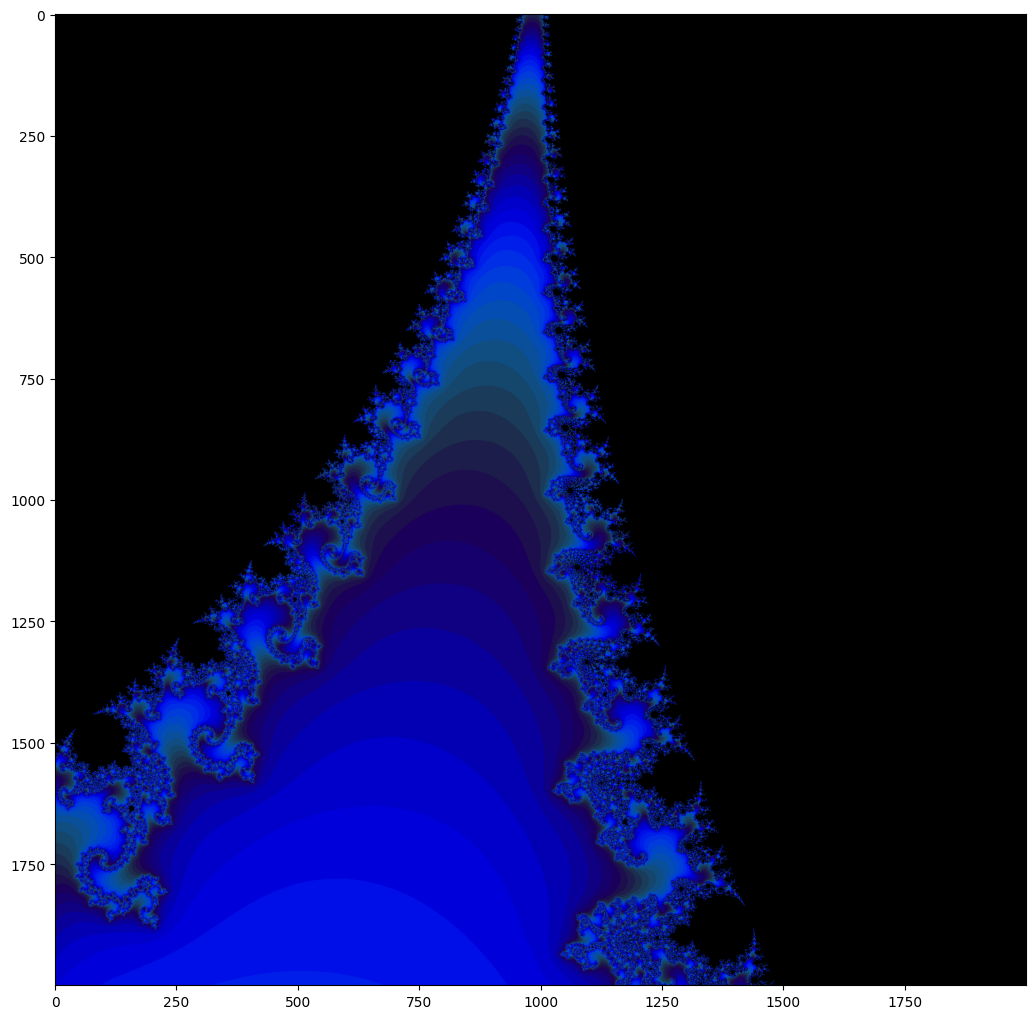

In [ ]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[0.05:0.25:0.0001, -0.85:-0.65:0.0001]
# [x:y:z] - change x & y to choose a section, change z to choose a resolution ratio

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) # Complex tensor z=x+yi
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0    # |z| > 4
    #Update variables to compute
    ns += not_diverged
    zs = zs_

#plot
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""

    if np.iscomplexobj(a): # to solve a complex warning
        a = np.abs(a)

    # The periodic value a for coloring is generated by periodic transformation
    # through iteration number a
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

Q2. Modify the code so to show a Julia set rather than the Mandelbrot set.

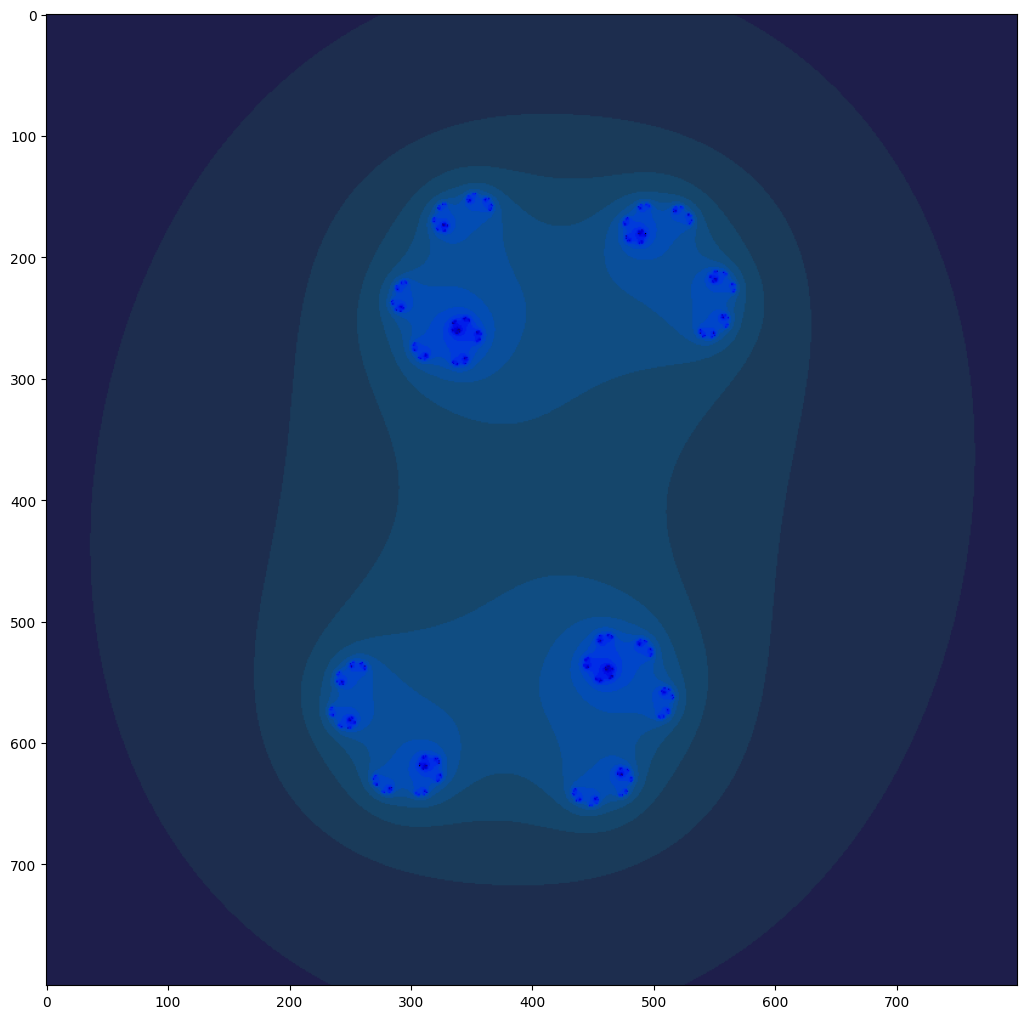

In [9]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-2:2:0.005, -2:2:0.005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!

# A fixed parameter c
# let c = 0.7 + 0.27015i
c_r = torch.Tensor([0.7]) # real part
c_i = torch.Tensor([0.27015]) # imaginary part
c = torch.complex(c_r, c_i)

zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)
c = c.to(device)

#Julia Set
for i in range(200):
    #Compute the new values of z: z^2 + c
    zs_ = zs*zs + c
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0    # Why < 4.0????
    #Update variables to compute
    ns += not_diverged
    zs = zs_

#plot
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""

    if np.iscomplexobj(a): # to solve a complex warning
        a = np.abs(a)

    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()